In [1]:
from dypac import Dypac
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from nilearn import datasets
from nilearn import image
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr

Let's start by downloading a yem subjects from the ADHD200 dataset.

In [2]:
n_subjects = 6
dev_dataset = datasets.fetch_development_fmri(n_subjects=n_subjects)
epi_filename = dev_dataset.func

In [3]:
from load_confounds import Confounds
conf = Confounds(["motion"], motion="simple").load(dev_dataset.confounds)

Now we run dypac. First we specify the model, with the main relevant options. Then we fit the model on the ADHD data.

In [18]:
model = Dypac(n_clusters=50, n_states=150, verbose=1, n_init=1, n_init_aggregation=1, n_replications=20, 
              detrend=True, smoothing_fwhm=5, standardize=True, n_batch=2, threshold_sim=0)
model.fit(epi_filename, confounds=conf)

[MultiNiftiMasker.fit] Loading data from [/home/pbellec/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz, /home/pbellec/nilearn_data/development_fmri/development_fmri/s
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[Dypac] load specified grey matter mask
[Dypac] Restrict brain mask to grey matter
[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[Dypac] Processing batch 0
[MultiNiftiMasker.transform_imgs] Loading data from Nifti1Image('/home/pbellec/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_imgs] Smoothing images
[MultiNiftiMasker.transform_imgs] Extracting region signals
[MultiNiftiMasker.transform_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


[MultiNiftiMasker.transform_imgs] Loading data from Nifti1Image('/home/pbellec/nilearn_data/development_fmri/development_fmri/sub-pixar002_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_imgs] Smoothing images
[MultiNiftiMasker.transform_imgs] Extracting region signals
[MultiNiftiMasker.transform_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 20/20 [00:13<00:00,  1.51it/s]


[MultiNiftiMasker.transform_imgs] Loading data from Nifti1Image('/home/pbellec/nilearn_data/development_fmri/development_fmri/sub-pixar004_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_imgs] Smoothing images
[MultiNiftiMasker.transform_imgs] Extracting region signals
[MultiNiftiMasker.transform_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 20/20 [00:12<00:00,  1.54it/s]


Consensus clustering.


Trimming states: 100%|██████████| 150/150 [00:00<00:00, 501.65it/s]


[Dypac] Processing batch 1
[MultiNiftiMasker.transform_imgs] Loading data from Nifti1Image('/home/pbellec/nilearn_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_imgs] Smoothing images
[MultiNiftiMasker.transform_imgs] Extracting region signals
[MultiNiftiMasker.transform_imgs] Cleaning extracted signals


Replicating clusters in data #0: 100%|██████████| 20/20 [00:12<00:00,  1.57it/s]


[MultiNiftiMasker.transform_imgs] Loading data from Nifti1Image('/home/pbellec/nilearn_data/development_fmri/development_fmri/sub-pixar003_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_imgs] Smoothing images
[MultiNiftiMasker.transform_imgs] Extracting region signals
[MultiNiftiMasker.transform_imgs] Cleaning extracted signals


Replicating clusters in data #1: 100%|██████████| 20/20 [00:12<00:00,  1.57it/s]


[MultiNiftiMasker.transform_imgs] Loading data from Nifti1Image('/home/pbellec/nilearn_data/development_fmri/development_fmri/sub-pixar005_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_imgs] Smoothing images
[MultiNiftiMasker.transform_imgs] Extracting region signals
[MultiNiftiMasker.transform_imgs] Cleaning extracted signals


Replicating clusters in data #2: 100%|██████████| 20/20 [00:13<00:00,  1.54it/s]


Consensus clustering.


Trimming states: 100%|██████████| 150/150 [00:00<00:00, 585.28it/s]


Inter-batch consensus
Generating consensus stability maps


Dypac(grey_matter='/home/pbellec/nilearn_data/icbm152_2009/mni_icbm152_nlin_sym_09a/mni_icbm152_gm_tal_nlin_sym_09a.nii.gz',
      mask=<nibabel.nifti1.Nifti1Image object at 0x7f7f472cffa0>,
      memory_level=1, n_batch=2, n_clusters=50, n_init=1, n_init_aggregation=1,
      n_replications=20, n_states=150,
      random_state=RandomState(MT19937) at 0x7F7F6FF08340, smoothing_fwhm=5,
      threshold_sim=0)

Visualize components maps.

/home/pbellec/env/dypac/lib/python3.8/site-packages/nilearn/reporting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



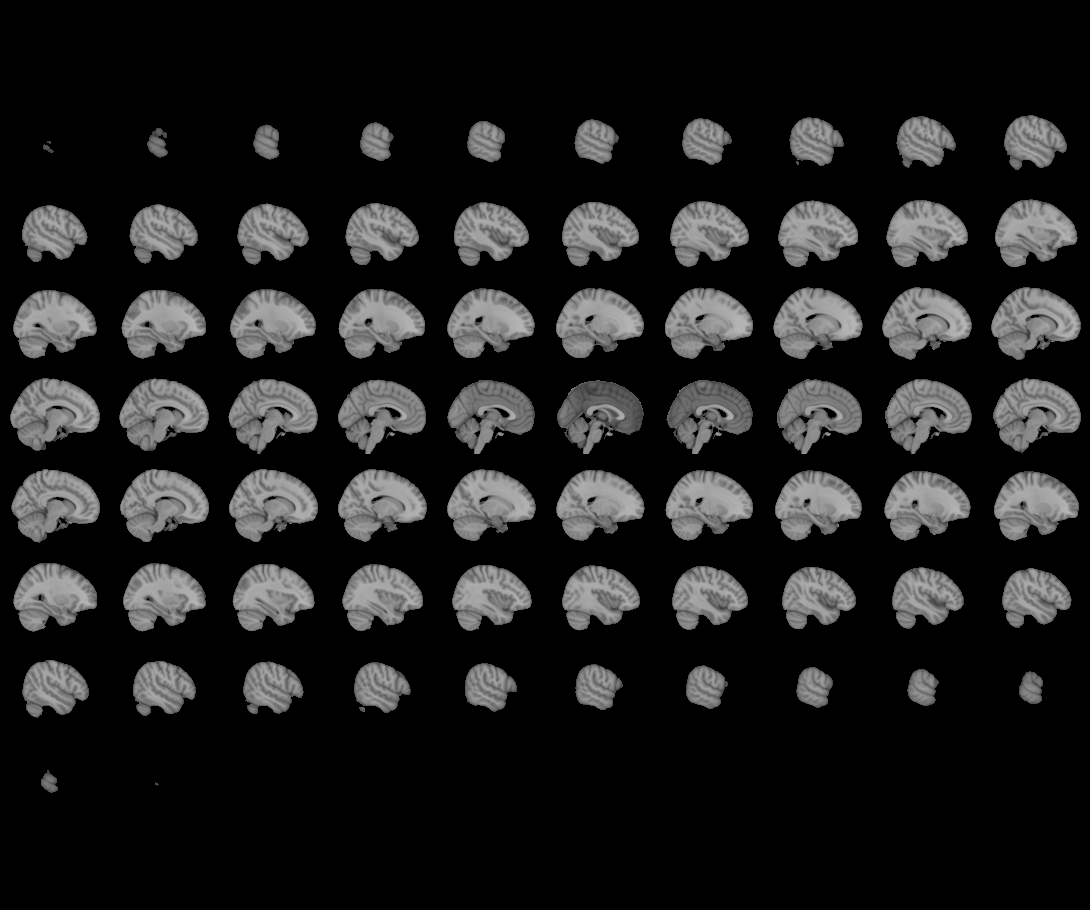
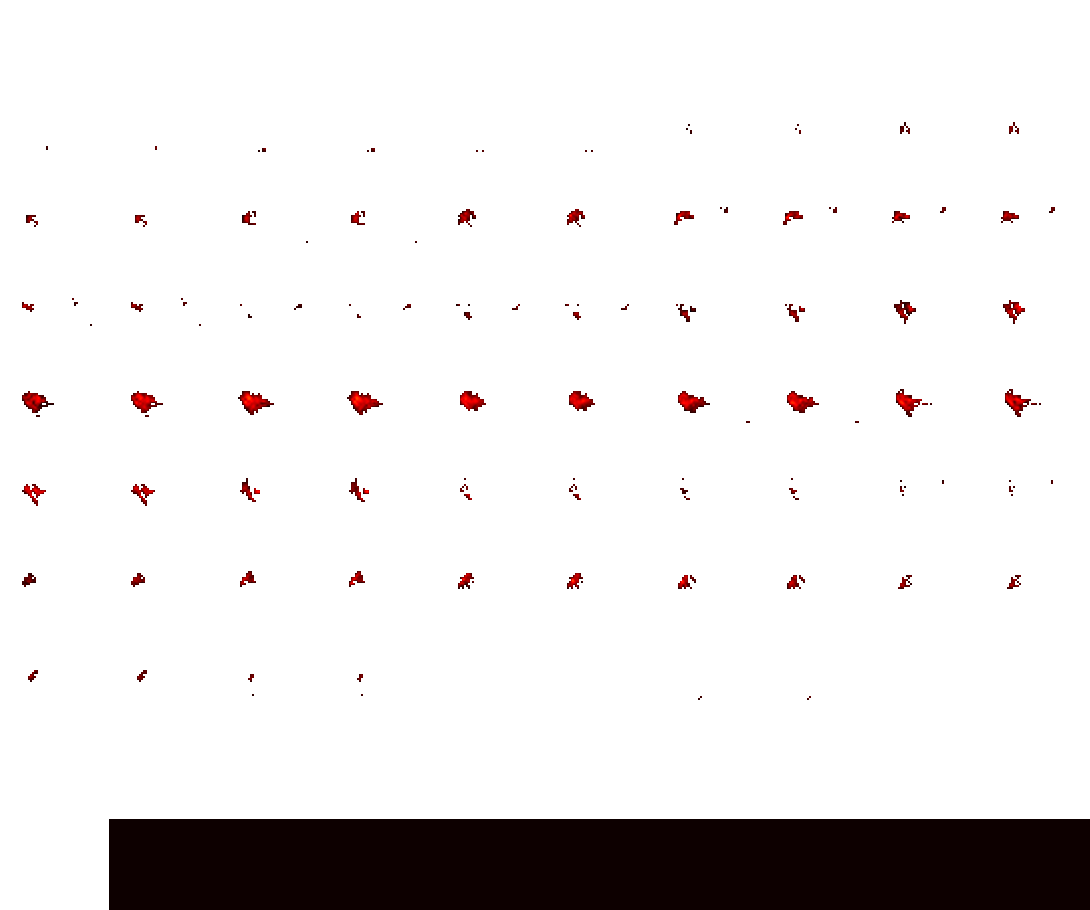

In [25]:
num_comp = 7# the component number
comp = model.masker_.inverse_transform(model.components_[num_comp,:].todense())
plotting.view_img(comp, threshold=0.1, vmax=1, title="Dwell time: {dt}".format(dt=model.dwell_time_[num_comp]))

We can project the data of one subject in the parcellation space, and visualize the time course of a parcel. Note that we shift the component index, because the first coefficient of the parcellation space corresponds to the intercept, which is not included in `components_`.

In [26]:
num_s = 0 # the subject number
weights = model.transform(epi_filename[num_s])

[MultiNiftiMasker.transform_imgs] Loading data from Nifti1Image('/home/pbellec/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_imgs] Smoothing images
[MultiNiftiMasker.transform_imgs] Extracting region signals
[MultiNiftiMasker.transform_imgs] Cleaning extracted signals


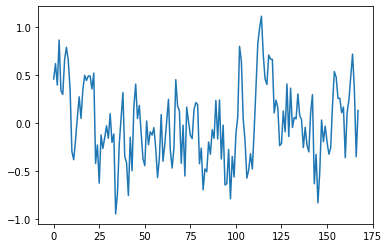

In [28]:
plt.plot(weights[:, num_comp + 1])

Let's now visualize one volume of the 4D data (after preprocessing is applied):

[MultiNiftiMasker.transform_imgs] Loading data from Nifti1Image('/home/pbellec/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_imgs] Smoothing images
[MultiNiftiMasker.transform_imgs] Extracting region signals
[MultiNiftiMasker.transform_imgs] Cleaning extracted signals


/home/pbellec/env/dypac/lib/python3.8/site-packages/nilearn/reporting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



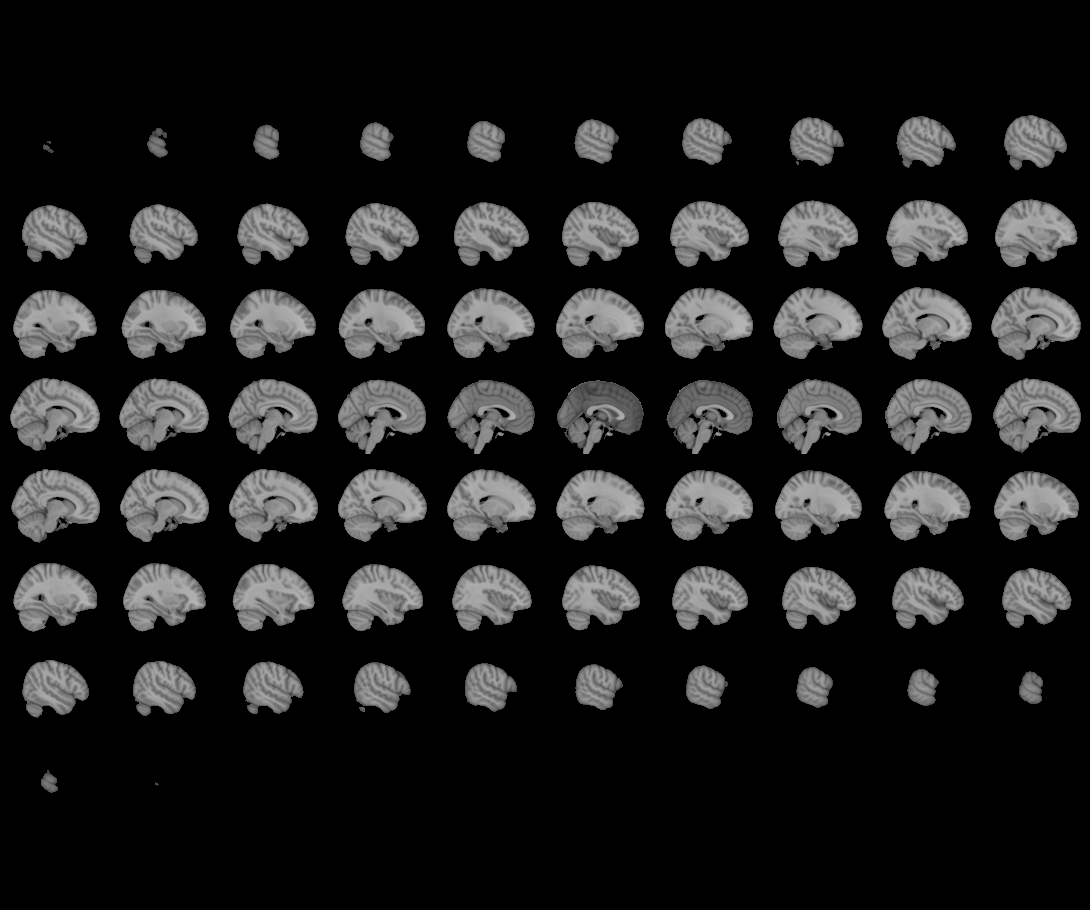
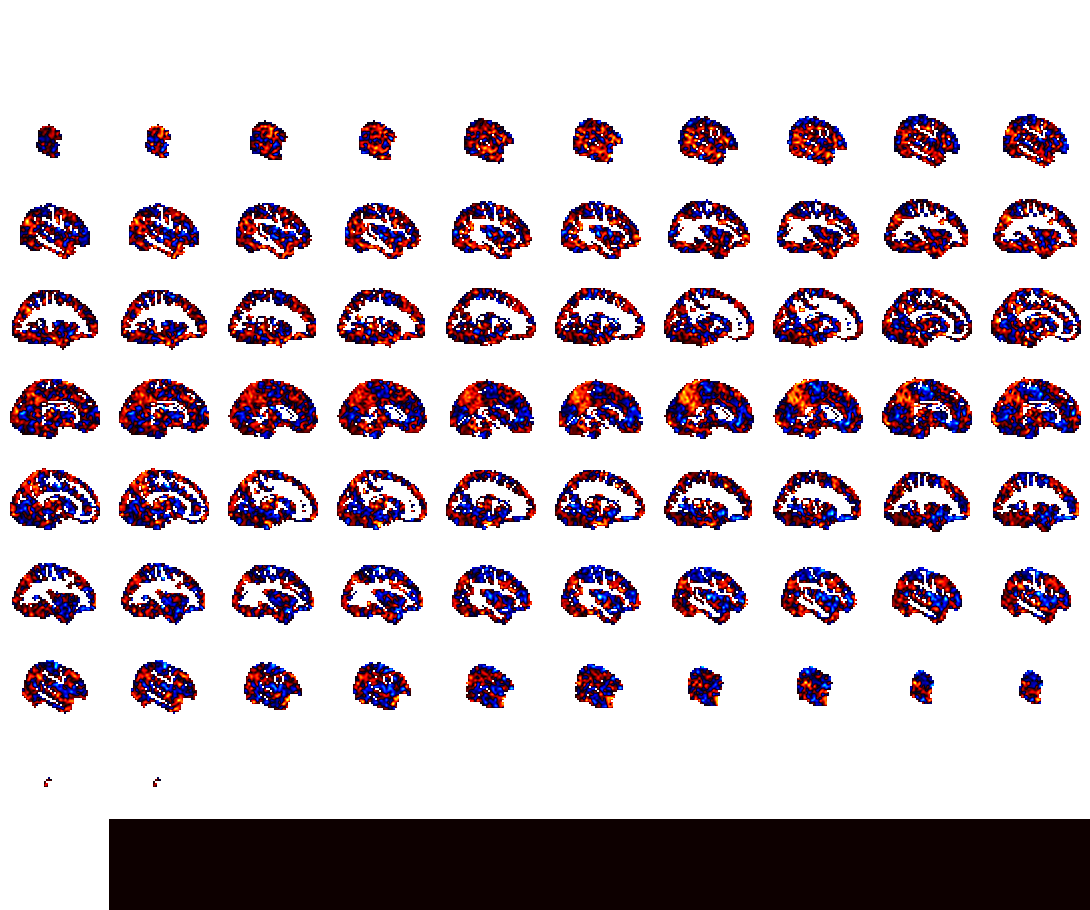

In [29]:
num_t = 65 # the frame number
img = model.load_img(epi_filename[num_s])
plotting.view_img(image.index_img(img, [num_t]), vmax=4)

We can compress the data in the parcellation space, to look if the approximation is accurate.

[MultiNiftiMasker.transform_imgs] Loading data from Nifti1Image(
shape=(50, 59, 50, 168),
affine=array([[   4.,    0.,    0.,  -96.],
       [   0.,    4.,    0., -132.],
       [   0.,    0.,    4.,  -78.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMasker.transform_imgs] Smoothing images
[MultiNiftiMasker.transform_imgs] Extracting region signals
[MultiNiftiMasker.transform_imgs] Cleaning extracted signals


/home/pbellec/env/dypac/lib/python3.8/site-packages/nilearn/reporting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



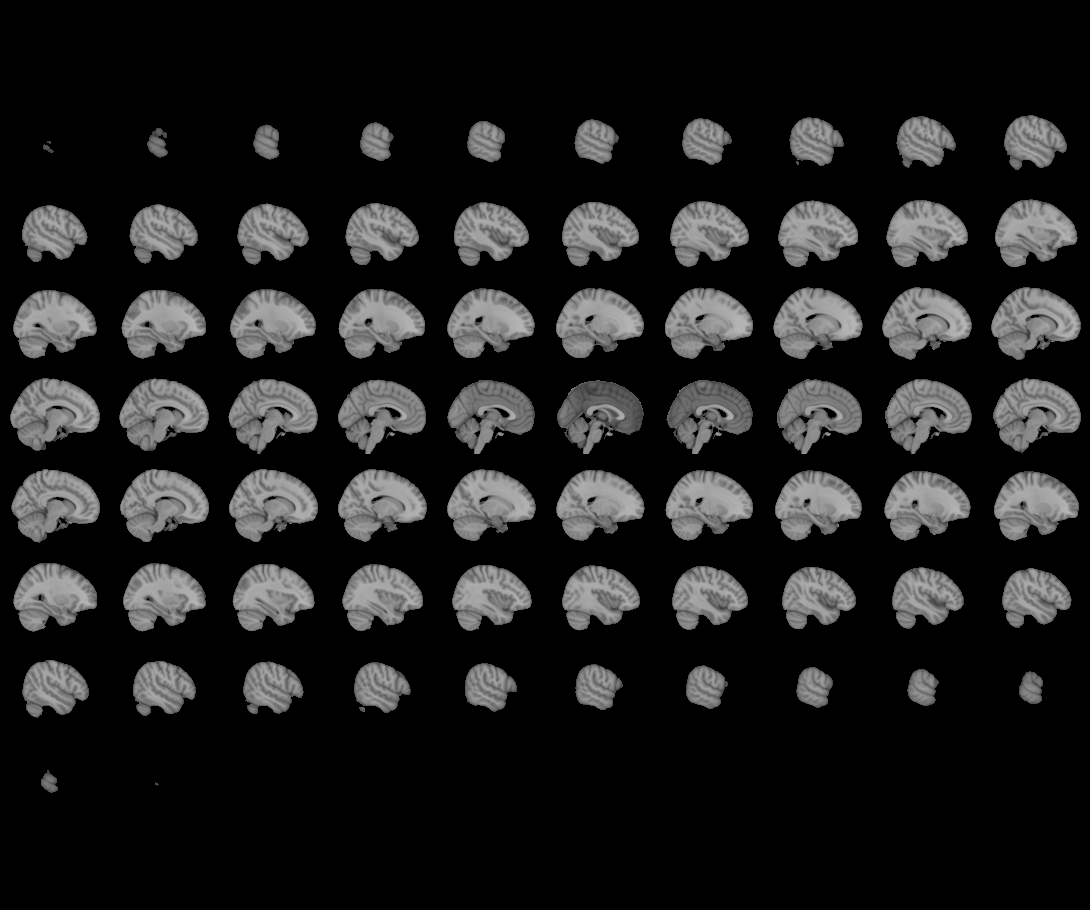
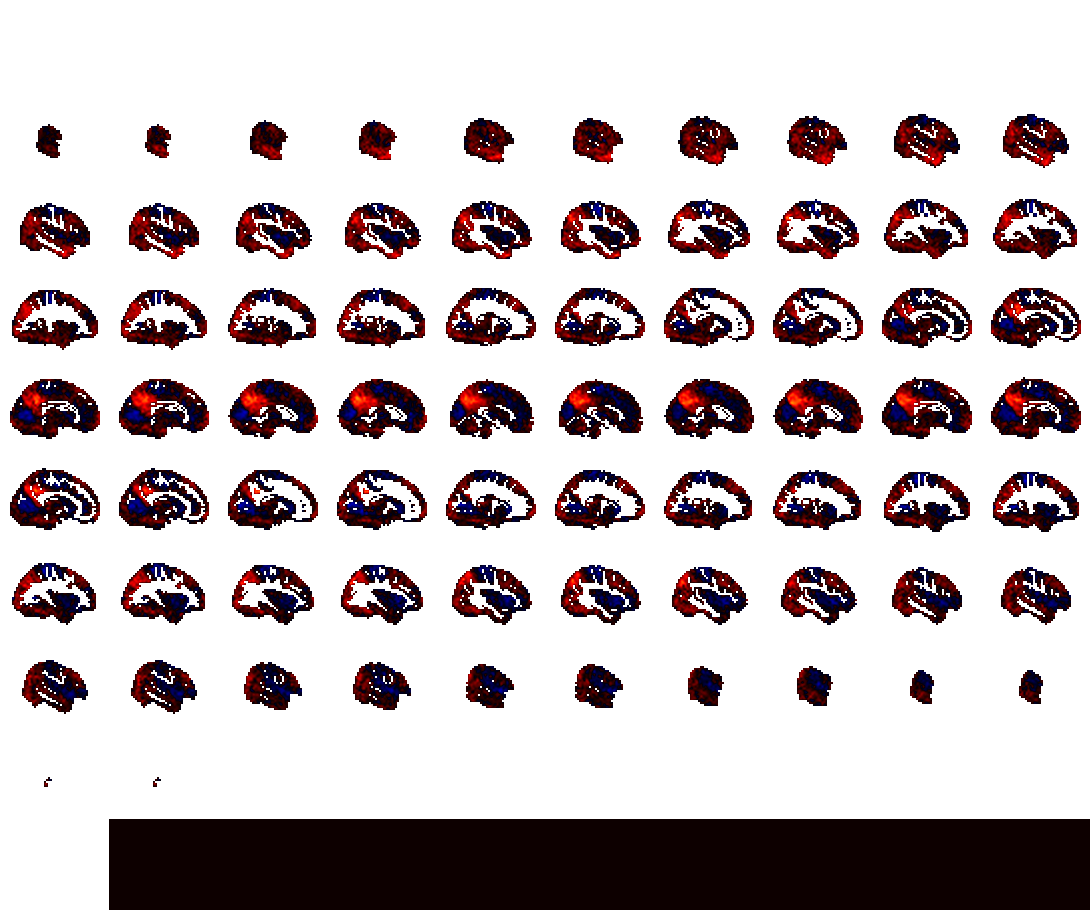

In [30]:
img_r = model.compress(img)
plotting.view_img(image.index_img(img_r, [num_t]), vmax=4)

It is possible to generate a R2 map, which quantifies the quality of this embedding. It computes the fraction of the variance of fMRI time series captured by the parcels. A score of 1 means perfect approximation. The score can be negative, in which case the parcellation approximation performs worst than the average of the signal. 

[MultiNiftiMasker.transform_imgs] Loading data from Nifti1Image(
shape=(50, 59, 50, 168),
affine=array([[   4.,    0.,    0.,  -96.],
       [   0.,    4.,    0., -132.],
       [   0.,    0.,    4.,  -78.],
       [   0.,    0.,    0.,    1.]])
)
[MultiNiftiMasker.transform_imgs] Smoothing images
[MultiNiftiMasker.transform_imgs] Extracting region signals
[MultiNiftiMasker.transform_imgs] Cleaning extracted signals


/home/pbellec/env/dypac/lib/python3.8/site-packages/nilearn/reporting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



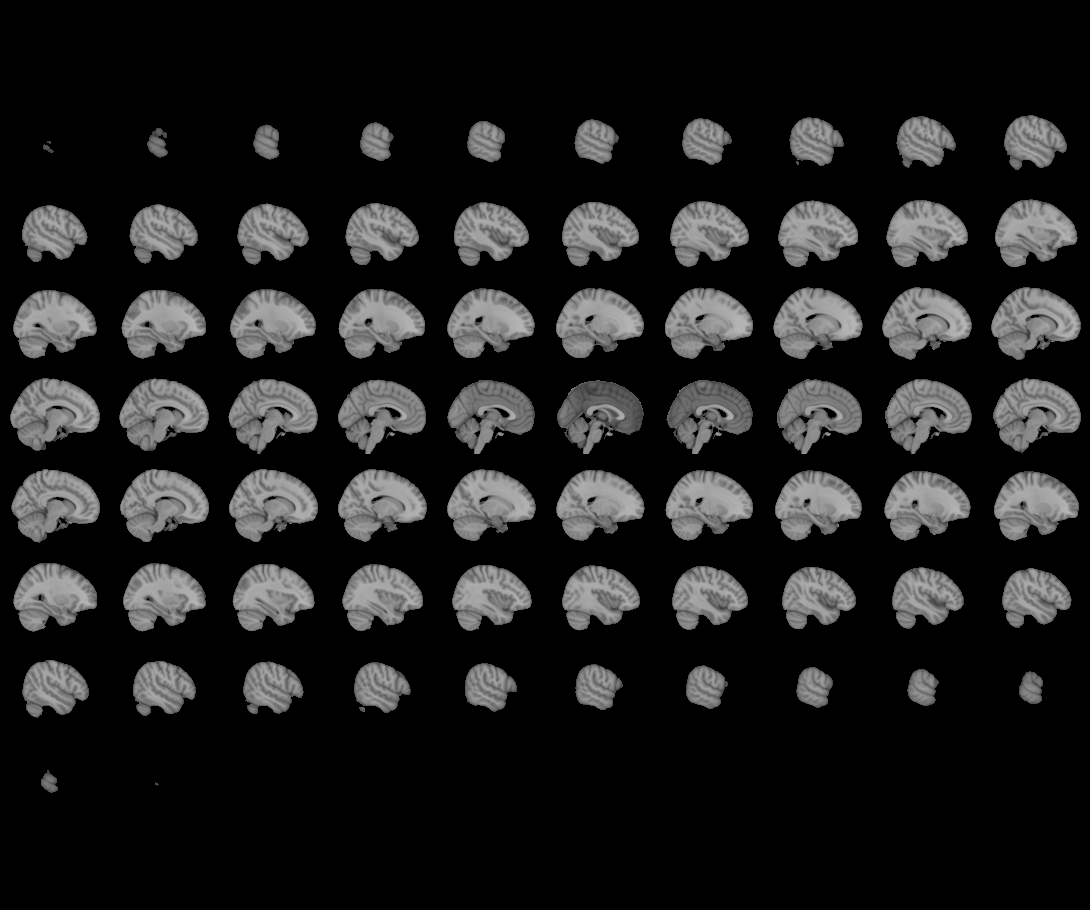
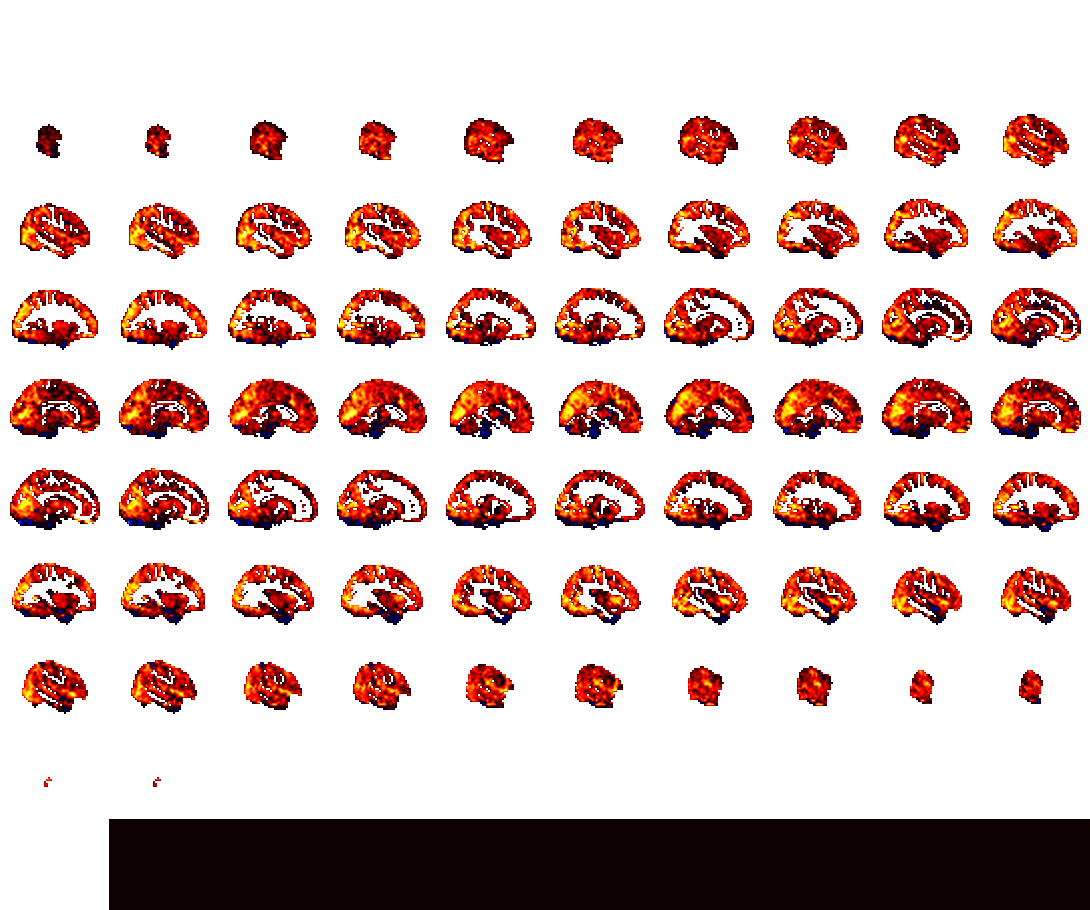

In [31]:
score = model.score(img, conf[0])
plotting.view_img(score, vmax=1)